# Bee Colony Optimization Algorithm 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as r

# Initialising Nodes

In [2]:
class Node:
    def __init__(self, idn, x, y):
        self.idn = idn
        self.pos = np.array((float(x), float(y)))

# Class for Bees

In [3]:
class Bee:
    def __init__(self):
        self.choosen_nodes = []
        self.recuiter = True
        self.distance = 0.0

    def choose_rand_node(self, move, nods):
        # choosen node must be unique
        for i in range(move):
            if self.is_complete():
                break
            else:
                sel = nods[r.randint(0, len(nodes) - 1)]
                while sel in self.choosen_nodes:
                    sel = nods[r.randint(0, len(nodes) - 1)]
                self.choosen_nodes.append(sel)

            self.total_distance()

    def change_role(self, role):
        self.recuiter = role

    def replace_nodes(self, nods):
        self.choosen_nodes = nods
        self.total_distance()

    def total_distance(self):
        distance = 0.0
        for i in range(len(self.choosen_nodes) - 1):
            node1 = self.choosen_nodes[i]
            node2 = self.choosen_nodes[i + 1]
            distance += np.linalg.norm(node1.pos - node2.pos)

        distance += np.linalg.norm(self.choosen_nodes[-1].pos - self.choosen_nodes[0].pos)
        self.distance = distance

    def is_complete(self):
        if len(self.choosen_nodes) >= len(nodes):
            return True
        else:
            return False



# Loading the Nodes

In [4]:
def load_nodes(filename):
    ret = []
    with open(filename) as f:
        nodes_s = f.readlines()
    nodes_s = [x.strip() for x in nodes_s]
    for n in nodes_s:
        node = n.split(' ')
        ret.append(Node(node[0], node[1], node[2]))    
    return ret

In [5]:
nodes = load_nodes(r"C:/Users/Shiva Chandra/Documents/Project/datasets/data")


In [6]:
def main():
    epoch = 10
    n_bee = 500
    n_move = 3

    bees = []
    best_bee = Bee()

    e = 0

    # init bees
    for i in range(n_bee):
        bees.append(Bee())

    while not best_bee.is_complete():

        print ("\nEpoch", e + 1)

        print ("forward pass")
        # forward pass
        for bee in bees:
            bee.choose_rand_node(n_move, nodes)

        # backward pass
        print ("evaluating")
        bees = sorted(bees, key=lambda be: be.distance, reverse=False)
        best_bee = bees[0]

        print ("Best distance so far", best_bee.distance)
        print ("Best route so far", [n.idn for n in best_bee.choosen_nodes])
        global route
        route=[n.idn for n in best_bee.choosen_nodes]
        print ("Bees are making decision to be recruiter or follower")
        Cmax = max(bees, key=lambda b: b.distance).distance
        Cmin = min(bees, key=lambda b: b.distance).distance

        recruiters = []
        for bee in bees:
            Ob = (Cmax - bee.distance) / (Cmax - Cmin)  # range [0,1]
            probs = np.e ** (-(1 - Ob) / (len(bee.choosen_nodes) * 0.01))
            rndm = r.uniform(0, 1)
            #print ("ob and probs", Ob, probs)
            if rndm < probs:
                bee.change_role(True)
                recruiters.append(bee)
            else:
                bee.change_role(False)

        print ("number of recruiter", len(recruiters))
        print ("Bees are choosing their recruiter")
        # creating a roulette wheel
        divider = sum([(Cmax - bee.distance) / (Cmax - Cmin) for bee in recruiters])
        probs = [((Cmax - bee.distance) / (Cmax - Cmin)) / divider for bee in recruiters]
        cumulative_probs = [sum(probs[:x + 1]) for x in range(len(probs))]

        for bee in bees:
            if not bee.recuiter:
                rndm = r.uniform(0, 1)
                selected_bee = Bee()
                for i, cp in enumerate(cumulative_probs):
                    if rndm < cp:
                        selected_bee = recruiters[i]
                        break
                bee.replace_nodes(selected_bee.choosen_nodes[:])
        e += 1
        

In [7]:
       
main()


Epoch 1
forward pass
evaluating
Best distance so far 5.233495205536614
Best route so far ['7', '12', '14']
Bees are making decision to be recruiter or follower
number of recruiter 10
Bees are choosing their recruiter

Epoch 2
forward pass
evaluating
Best distance so far 12.258574475617003
Best route so far ['13', '6', '7', '10', '12', '14']
Bees are making decision to be recruiter or follower
number of recruiter 14
Bees are choosing their recruiter

Epoch 3
forward pass
evaluating
Best distance so far 27.12771156260326
Best route so far ['13', '6', '7', '10', '12', '14', '8', '1', '15']
Bees are making decision to be recruiter or follower
number of recruiter 34
Bees are choosing their recruiter

Epoch 4
forward pass
evaluating
Best distance so far 43.12421387293609
Best route so far ['6', '7', '15', '12', '14', '10', '13', '1', '8', '2', '3', '16']
Bees are making decision to be recruiter or follower
number of recruiter 39
Bees are choosing their recruiter

Epoch 5
forward pass
evalua

# Route how the Bees are travelling

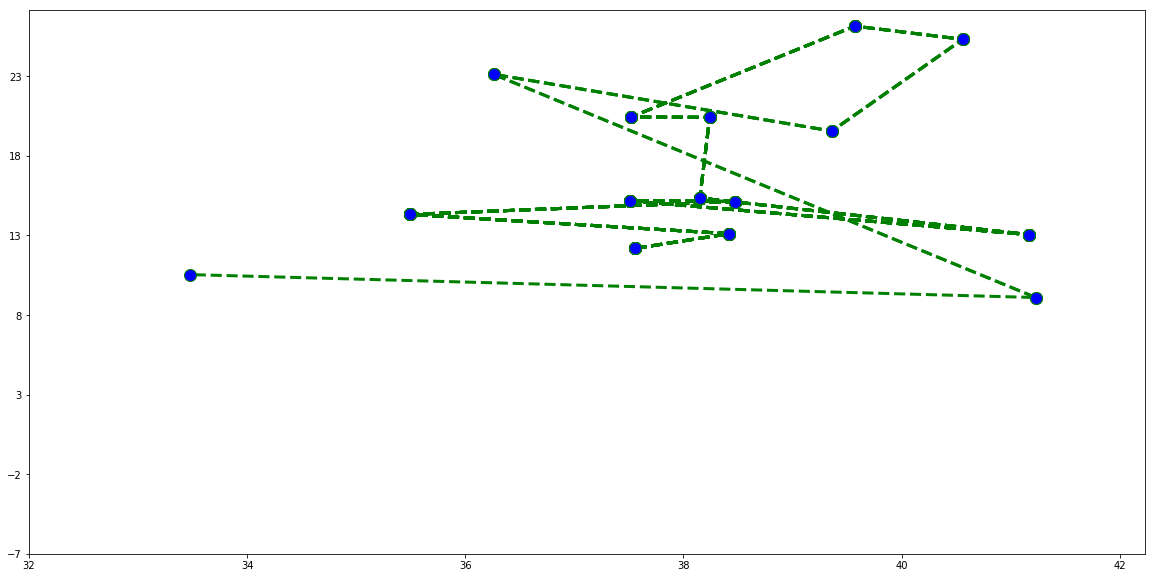

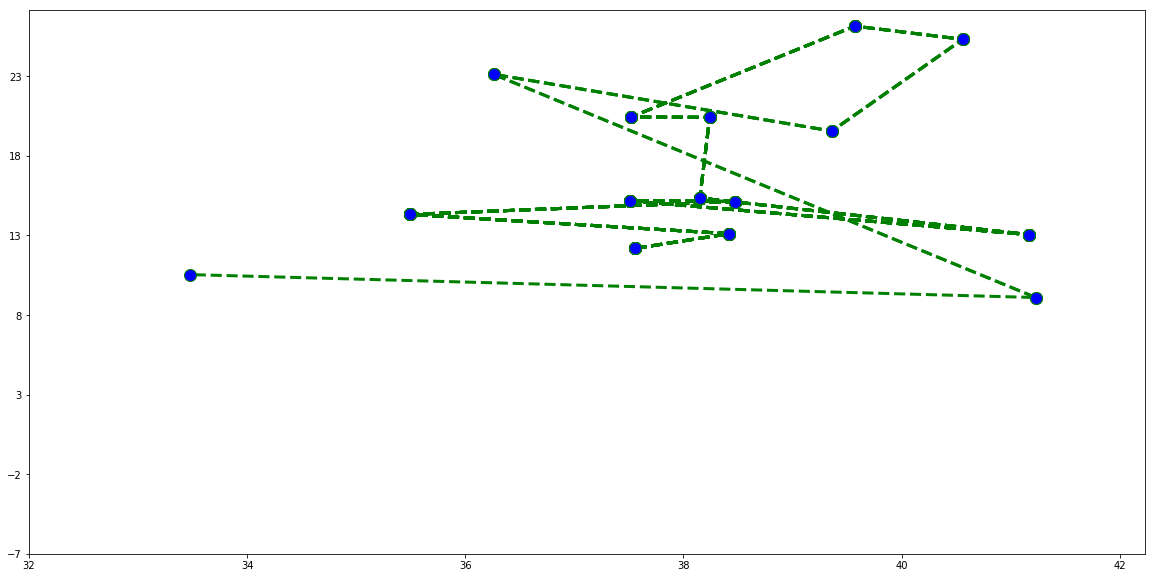

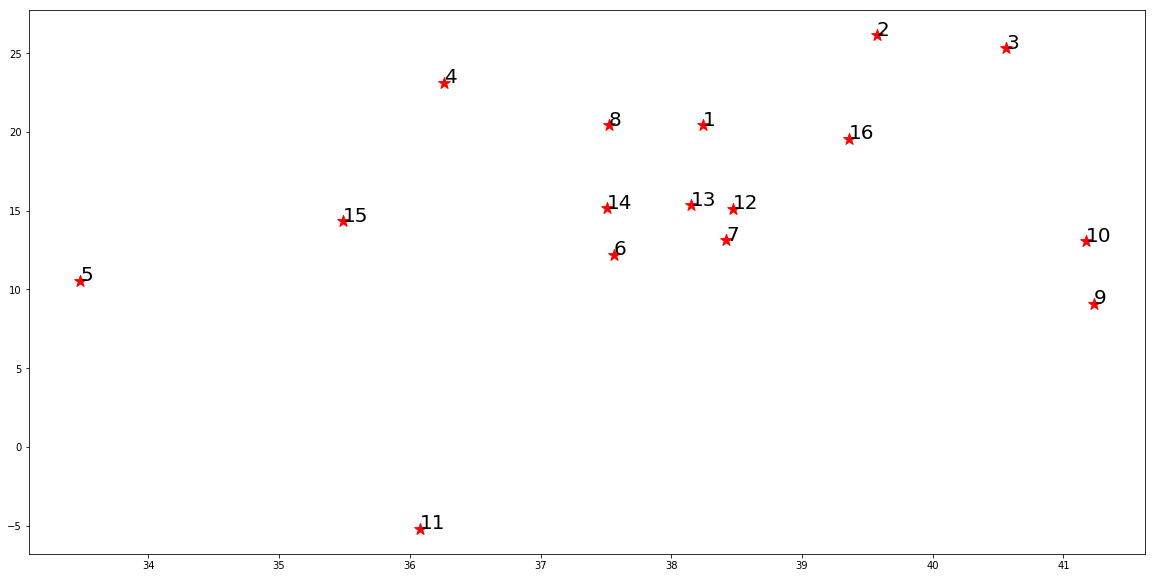

In [8]:

import math
from IPython import display
import pylab as pl
import time
def Route():
    x = [node.pos[0] for node in nodes]
    y = [node.pos[1] for node in nodes]
    l = [node.idn for node in nodes]
    print(route)
    print(type(x[0]))
    print(type(route[0]))
    x1=[]
    y1=[]
    for i in route:
        x1.append(float(x[int(i)-1]))
        y1.append(float(y[int(i)-1]))
    minx=min(x1)  
    maxx=max(x1)
    miny=min(y1)
    maxy=max(y1)
    plt.figure(figsize=(20,10))
    for i in range(1,len(x1)):
        k=x1[0:i]
        u=y1[0:i]
        plt.plot(k, u, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
        plt.xlim([minx-1, maxx+1])
        plt.ylim([miny-1, maxy+1])
        plt.yticks(np.arange(math.floor(miny-1),math.ceil( maxy+1), 5))
        plt.xticks(np.arange(math.floor(minx-1),math.ceil( maxx+1),2))
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(1.0)
        

    fig,ax = plt.subplots(figsize=(20,10))
    ax.scatter(x, y,s=150,color='red',marker='*')

    for i, lbl in enumerate(l):
        ax.annotate(lbl, (x[i], y[i]),size=20)

    
    #plt.show()




Route()
